In [35]:
import pandas as pd
import numpy as np

daily = pd.read_csv("../data/daily_ai_saas_experiment.csv")
user = pd.read_csv("../data/user_ai_saas_experiment.csv")

daily.shape, user.shape


((1500000, 19), (50000, 18))

In [36]:
daily.head()

,user_id,day,cohort,treatment,ai_calls,tokens_generated,tasks_completed,satisfaction_score,retention_7d,revenue,time_on_platform,region,device,company_size,signup_age,confounder_score,power_user,baseline_productivity,churn_risk
0,1,1,C_adaptive_v2,1,8,1708,4,4.160681,0,0.0,41.081241,EU,mobile,Mid-Market,348,12.623938,1,62.107043,0.464771
1,1,2,C_adaptive_v2,1,11,3380,2,3.501675,1,0.0,26.564852,EU,mobile,Mid-Market,348,12.623938,1,62.107043,0.464771
2,1,3,C_adaptive_v2,1,3,895,1,3.360445,0,0.0,31.804757,EU,mobile,Mid-Market,348,12.623938,1,62.107043,0.464771
3,1,4,C_adaptive_v2,1,10,2225,5,4.188914,1,0.0,39.207091,EU,mobile,Mid-Market,348,12.623938,1,62.107043,0.464771
4,1,5,C_adaptive_v2,1,9,2228,2,4.120815,0,18.0,29.958863,EU,mobile,Mid-Market,348,12.623938,1,62.107043,0.464771


In [37]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   user_id                1500000 non-null  int64  
 1   day                    1500000 non-null  int64  
 2   cohort                 1500000 non-null  object 
 3   treatment              1500000 non-null  int64  
 4   ai_calls               1500000 non-null  int64  
 5   tokens_generated       1500000 non-null  int64  
 6   tasks_completed        1500000 non-null  int64  
 7   satisfaction_score     1500000 non-null  float64
 8   retention_7d           1500000 non-null  int64  
 9   revenue                1500000 non-null  float64
 10  time_on_platform       1500000 non-null  float64
 11  region                 1500000 non-null  object 
 12  device                 1500000 non-null  object 
 13  company_size           1500000 non-null  object 
 14  signup_age        

In [38]:
daily.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1500000.0,25000.500000,14433.761538,1.000000,12500.750000,25000.500000,37500.250000,50000.000000
day,1500000.0,15.500000,8.655444,1.000000,8.000000,15.500000,23.000000,30.000000
treatment,1500000.0,0.657940,0.474400,0.000000,0.000000,1.000000,1.000000,1.000000
ai_calls,1500000.0,6.055611,3.168655,0.000000,4.000000,6.000000,8.000000,24.000000
tokens_generated,1500000.0,1816.277272,1009.828887,0.000000,1051.000000,1704.000000,2448.000000,8876.000000
tasks_completed,1500000.0,1.929991,1.509009,0.000000,1.000000,2.000000,3.000000,13.000000
satisfaction_score,1500000.0,3.434257,0.750005,1.000000,2.924655,3.443934,3.957368,5.000000
retention_7d,1500000.0,0.303591,0.459808,0.000000,0.000000,0.000000,1.000000,1.000000
revenue,1500000.0,4.981673,11.104256,0.000000,0.000000,0.000000,10.000000,90.000000
time_on_platform,1500000.0,23.162906,5.928567,1.000000,19.101516,22.926919,26.977420,54.045011


In [39]:
user.head()

,user_id,region,device,company_size,baseline_productivity,churn_risk,power_user,signup_age,cohort,treatment,confounder_score,ai_calls,tokens_generated,tasks_completed,satisfaction_score,time_on_platform,revenue,retention_7d
0,1,EU,mobile,Mid-Market,62.107043,0.464771,1,348,C_adaptive_v2,1,12.623938,9.466667,2682.700000,3.433333,3.974403,31.062460,126.0,0.433333
1,2,APAC,desktop,Mid-Market,49.408121,0.620917,0,216,C_adaptive_v2,1,7.437926,7.900000,2513.966667,2.666667,3.615279,22.216239,96.0,0.366667
2,3,IN,desktop,SMB,69.439479,0.715383,0,239,B_adaptive_v1,1,4.886587,8.066667,2309.833333,2.800000,3.688831,24.010227,72.0,0.433333
3,4,IN,mobile,Mid-Market,70.667116,0.879422,1,194,B_adaptive_v1,1,17.020408,9.100000,2623.933333,3.066667,3.930650,29.069976,198.0,0.366667
4,5,US,desktop,SMB,15.202498,0.702977,0,166,A_control,0,-12.813207,2.366667,679.333333,0.333333,3.032597,19.771196,120.0,0.166667


In [40]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                50000 non-null  int64  
 1   region                 50000 non-null  object 
 2   device                 50000 non-null  object 
 3   company_size           50000 non-null  object 
 4   baseline_productivity  50000 non-null  float64
 5   churn_risk             50000 non-null  float64
 6   power_user             50000 non-null  int64  
 7   signup_age             50000 non-null  int64  
 8   cohort                 50000 non-null  object 
 9   treatment              50000 non-null  int64  
 10  confounder_score       50000 non-null  float64
 11  ai_calls               50000 non-null  float64
 12  tokens_generated       50000 non-null  float64
 13  tasks_completed        50000 non-null  float64
 14  satisfaction_score     50000 non-null  float64
 15  ti

In [41]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50000.0,25000.500000,14433.901067,1.000000,12500.750000,25000.500000,37500.250000,50000.000000
baseline_productivity,50000.0,59.962404,14.917813,5.000000,49.811003,59.924144,70.070161,100.000000
churn_risk,50000.0,0.501569,0.288739,0.000002,0.251990,0.500680,0.750579,0.999979
power_user,50000.0,0.148960,0.356053,0.000000,0.000000,0.000000,0.000000,1.000000
signup_age,50000.0,201.793060,113.658381,5.000000,104.000000,202.000000,300.000000,399.000000
treatment,50000.0,0.657940,0.474404,0.000000,0.000000,1.000000,1.000000,1.000000
confounder_score,50000.0,9.446255,9.560660,-25.130596,2.767118,9.294350,15.929128,49.333976
ai_calls,50000.0,6.055611,2.049231,1.500000,3.666667,6.866667,7.533333,11.033333
tokens_generated,50000.0,1816.277272,617.795921,457.000000,1101.616667,2051.666667,2267.566667,3422.733333
tasks_completed,50000.0,1.929991,0.824740,0.166667,1.000000,2.200000,2.533333,4.266667


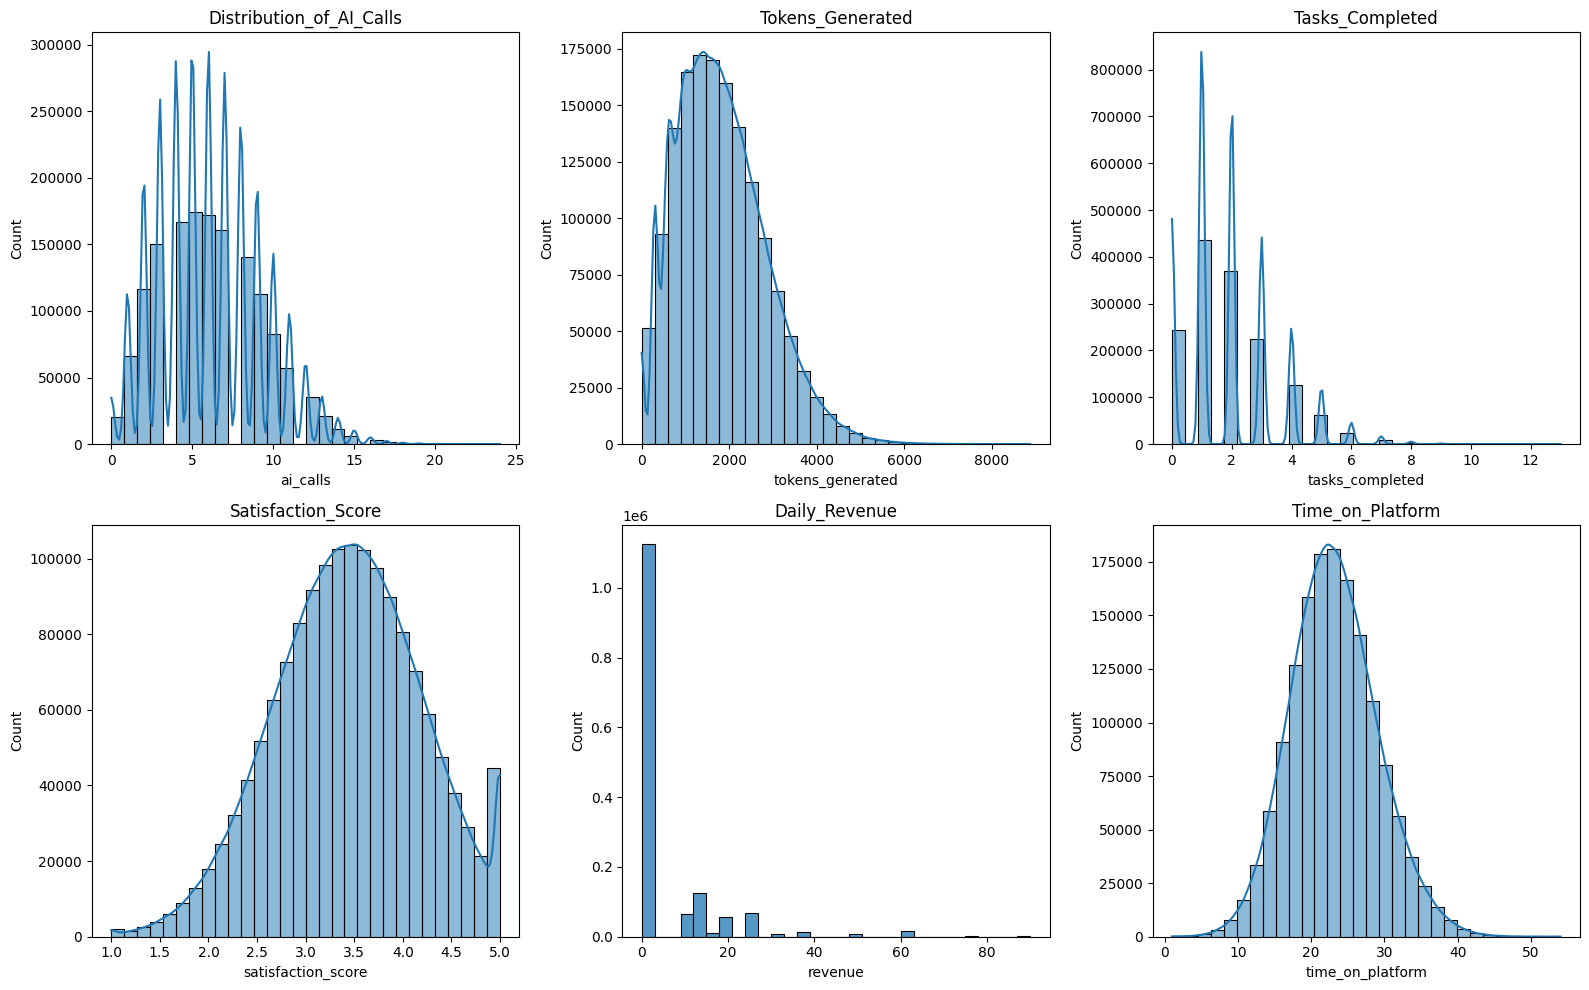

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
sns.histplot(daily["ai_calls"], kde=True, bins=30)
plt.title("Distribution_of_AI_Calls")

plt.subplot(2,3,2)
sns.histplot(daily["tokens_generated"], kde=True, bins=30)
plt.title("Tokens_Generated")

plt.subplot(2,3,3)
sns.histplot(daily["tasks_completed"], kde=True, bins=30)
plt.title("Tasks_Completed")

plt.subplot(2,3,4)
sns.histplot(daily["satisfaction_score"], kde=True, bins=30)
plt.title("Satisfaction_Score")

plt.subplot(2,3,5)
sns.histplot(daily["revenue"], kde=False, bins=30)
plt.title("Daily_Revenue")

plt.subplot(2,3,6)
sns.histplot(daily["time_on_platform"], kde=True, bins=30)
plt.title("Time_on_Platform")

plt.tight_layout()
plt.show()


In [43]:
daily.groupby("cohort")[["ai_calls","tasks_completed","satisfaction_score","retention_7d","revenue"]].mean()

,ai_calls,tasks_completed,satisfaction_score,retention_7d,revenue
cohort,,,,,
A_control,3.415605,0.885991,3.045240,0.260904,4.403243
B_adaptive_v1,7.426096,2.471944,3.636145,0.325231,5.277295
C_adaptive_v2,7.430170,2.473575,3.636865,0.326336,5.287477


Are these differences statistically significant?

In [44]:
import scipy.stats as stats

def coh_mean(col):
    return daily.groupby("cohort")[col].mean()

metrics = ["ai_calls", "tasks_completed", "satisfaction_score", "retention_7d", "revenue"]

for m in metrics:
    print("\n=== Metric:", m, "===")
    a = daily[daily["cohort"]=="A_control"][m]
    b = daily[daily["cohort"]=="B_adaptive_v1"][m]
    c = daily[daily["cohort"]=="C_adaptive_v2"][m]

    t_ab, p_ab = stats.ttest_ind(a, b, equal_var=False)
    t_ac, p_ac = stats.ttest_ind(a, c, equal_var=False)
    t_bc, p_bc = stats.ttest_ind(b, c, equal_var=False)

    print("A vs B p-value:", p_ab)
    print("A vs C p-value:", p_ac)
    print("B vs C p-value:", p_bc)



=== Metric: ai_calls ===
A vs B p-value: 0.0
A vs C p-value: 0.0
B vs C p-value: 0.46837660523754143

=== Metric: tasks_completed ===
A vs B p-value: 0.0
A vs C p-value: 0.0
B vs C p-value: 0.5818849437281028

=== Metric: satisfaction_score ===
A vs B p-value: 0.0
A vs C p-value: 0.0
B vs C p-value: 0.6048900455399993

=== Metric: retention_7d ===
A vs B p-value: 0.0
A vs C p-value: 0.0
B vs C p-value: 0.24162537797949707

=== Metric: revenue ===
A vs B p-value: 0.0
A vs C p-value: 0.0
B vs C p-value: 0.6666475333217015


In [45]:
def lift(treat, control):
    return (treat - control) / control * 100

coh_means = daily.groupby("cohort")[["ai_calls","tasks_completed","satisfaction_score","retention_7d","revenue"]].mean()

control = coh_means.loc["A_control"]
b = coh_means.loc["B_adaptive_v1"]
c = coh_means.loc["C_adaptive_v2"]

for col in coh_means.columns:
    print(f"\n=== {col.upper()} ===")
    print("B Lift over A: ", round(lift(b[col], control[col]), 2), "%")
    print("C Lift over A: ", round(lift(c[col], control[col]), 2), "%")
    print("C Lift over B: ", round(lift(c[col], b[col]), 2), "%")



=== AI_CALLS ===
B Lift over A:  117.42 %
C Lift over A:  117.54 %
C Lift over B:  0.05 %

=== TASKS_COMPLETED ===
B Lift over A:  179.0 %
C Lift over A:  179.19 %
C Lift over B:  0.07 %

=== SATISFACTION_SCORE ===
B Lift over A:  19.4 %
C Lift over A:  19.43 %
C Lift over B:  0.02 %

=== RETENTION_7D ===
B Lift over A:  24.66 %
C Lift over A:  25.08 %
C Lift over B:  0.34 %

=== REVENUE ===
B Lift over A:  19.85 %
C Lift over A:  20.08 %
C Lift over B:  0.19 %


- Adaptive AI DOUBLES usage.
- Version C adds no real extra value over B.

- +179% lift — this is insane
- Treated users complete ~3× more tasks
- Again C gains <0.1% over B

In [46]:
causal_df = user[[
    "treatment",
    "ai_calls",
    "tasks_completed",
    "satisfaction_score",
    "retention_7d",
    "revenue",
    "region",
    "device",
    "company_size",
    "baseline_productivity",
    "churn_risk",
    "power_user",
    "signup_age",
    "confounder_score"
]].copy()

# Encode categorical variables
causal_df = pd.get_dummies(causal_df, drop_first=True)

causal_df.head()


,treatment,ai_calls,tasks_completed,satisfaction_score,retention_7d,revenue,baseline_productivity,churn_risk,power_user,signup_age,confounder_score,region_EU,region_IN,region_US,device_mobile,company_size_Mid-Market,company_size_SMB
0,1,9.466667,3.433333,3.974403,0.433333,126.0,62.107043,0.464771,1,348,12.623938,True,False,False,True,True,False
1,1,7.900000,2.666667,3.615279,0.366667,96.0,49.408121,0.620917,0,216,7.437926,False,False,False,False,True,False
2,1,8.066667,2.800000,3.688831,0.433333,72.0,69.439479,0.715383,0,239,4.886587,False,True,False,False,False,True
3,1,9.100000,3.066667,3.930650,0.366667,198.0,70.667116,0.879422,1,194,17.020408,False,True,False,True,True,False
4,0,2.366667,0.333333,3.032597,0.166667,120.0,15.202498,0.702977,0,166,-12.813207,False,False,True,False,False,True


# Creating Treatment & Control Models

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Outcome
Y = causal_df["satisfaction_score"]

# Treatment assignment
T = causal_df["treatment"]

# Features
X = causal_df.drop(columns=["satisfaction_score", "treatment"])

# train-test split
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(
    X, T, Y, test_size=0.2, random_state=42
)

# Split into treatment and control groups
X_treat = X_train[T_train == 1]
Y_treat = Y_train[T_train == 1]

X_ctrl = X_train[T_train == 0]
Y_ctrl = Y_train[T_train == 0]

# Train models
model_treat = XGBRegressor(n_estimators=200, max_depth=5, random_state=42)
model_ctrl = XGBRegressor(n_estimators=200, max_depth=5, random_state=42)

model_treat.fit(X_treat, Y_treat)
model_ctrl.fit(X_ctrl, Y_ctrl)

# Predict uplift: P(Y|T=1) – P(Y|T=0)
tau_treat = model_treat.predict(X_test)
tau_ctrl = model_ctrl.predict(X_test)

uplift = tau_treat - tau_ctrl

uplift[:10]


array([0.45431423, 0.72711205, 0.6610832 , 0.38767695, 0.5304215 ,
       0.4637854 , 0.3816867 , 0.5994382 , 0.6263075 , 0.56676435],
      dtype=float32)

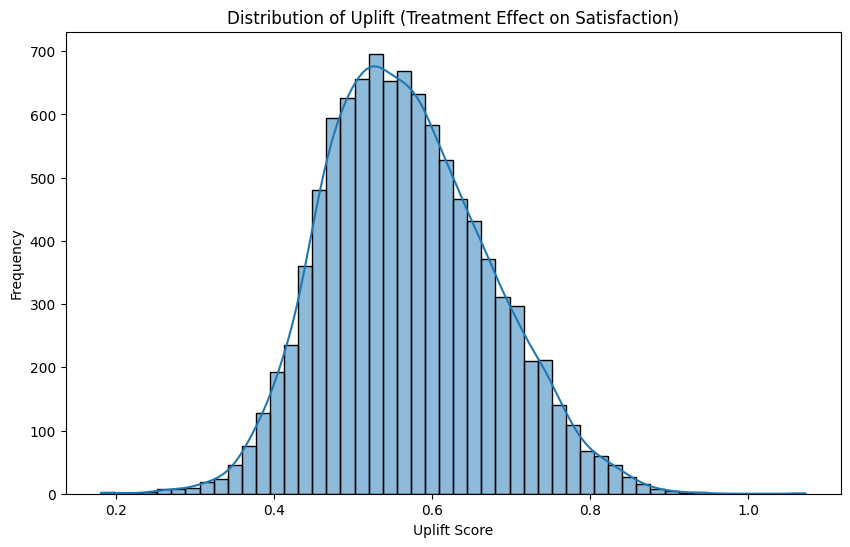

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(uplift, kde=True, bins=50)
plt.title("Distribution of Uplift (Treatment Effect on Satisfaction)")
plt.xlabel("Uplift Score")
plt.ylabel("Frequency")
plt.show()


In [49]:
X.columns

Index(['ai_calls', 'tasks_completed', 'retention_7d', 'revenue',
       'baseline_productivity', 'churn_risk', 'power_user', 'signup_age',
       'confounder_score', 'region_EU', 'region_IN', 'region_US',
       'device_mobile', 'company_size_Mid-Market', 'company_size_SMB'],
      dtype='object')

Feature Importance for Uplift (Causal Feature Importance)

In [50]:
feat_importance = cf.feature_importances_
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feat_importance
}).sort_values(by="importance", ascending=False)

importance_df


,feature,importance
6,power_user,0.334332
2,retention_7d,0.133908
4,baseline_productivity,0.117476
3,revenue,0.092577
7,signup_age,0.089365
5,churn_risk,0.088478
8,confounder_score,0.071874
1,tasks_completed,0.038029
13,company_size_Mid-Market,0.008434
14,company_size_SMB,0.006463


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_20778/1114585399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")


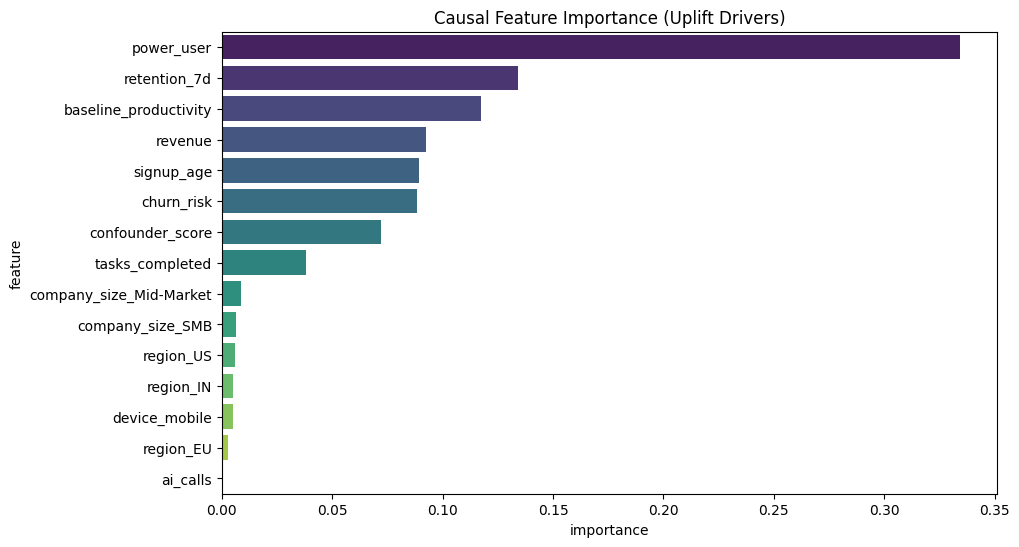

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")
plt.title("Causal Feature Importance (Uplift Drivers)")
plt.show()


### adaptive system works best for:

- Power users

- High retention users

- High productivity users

- Revenue-generating users

Uplift vs Feature (Partial Dependence for Treatment Effect)

In [52]:
# Createing uplift segments

In [53]:
df_uplift = pd.DataFrame({
    "uplift": uplift })

In [54]:
df_uplift["segment"] = pd.qcut(
    df_uplift["uplift"],
    5,labels=["Very Low", "Low", "Medium", "High", "Very High"])

In [55]:
segmented = pd.concat([X_test.reset_index(drop=True), df_uplift], axis=1)

In [60]:
segment_analysis = segmented.groupby("segment").agg({
    "uplift": "mean",
    "baseline_productivity": "mean",
    "churn_risk": "mean",
    "power_user": "mean",
    "revenue": "mean",
    "retention_7d": "mean"
}).round(3)

segment_analysis


/var/folders/yq/dbkmzsz903j7_vv5g3b87kpw0000gn/T/ipykernel_20778/3035176246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = segmented.groupby("segment").agg({


,uplift,baseline_productivity,churn_risk,power_user,revenue,retention_7d
segment,,,,,,
Very Low,0.433,59.163,0.446,0.074,149.476,0.341
Low,0.507,59.053,0.497,0.103,152.212,0.311
Medium,0.560,59.679,0.525,0.178,156.579,0.300
High,0.620,60.061,0.527,0.222,151.201,0.293
Very High,0.721,62.070,0.479,0.199,138.164,0.274


### VERY HIGH UPLIFT

- highest uplift (0.721)
- highest productivity (62+)
- decent churn risk (0.47)
- good power users (20%)

Revenue is worst and retention is lowest.

Marginal uplift between B and C is small (statistically the same)

Adaptive_v2 is not significantly better than Adaptive_v1

Highest uplift segments are NOT paying more → risk of revenue leak

Medium uplift segment gives the maximum money